In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
import tools

from datetime import datetime
import pytz

# Part 1: Downloading and importing Jeddah Weather Data

In [2]:
# Open the CSV file
df_isd = tools.read_isd_csv('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/41024099999.csv')

In [3]:
# Show a first glince of our data
df_isd

,TMP,DEW,WND
2023-01-01 00:00:00,24.0,20.0,2.1
2023-01-01 00:00:00,24.0,20.0,2.1
2023-01-01 01:00:00,23.0,20.0,1.5
2023-01-01 02:00:00,23.0,20.0,NaN
2023-01-01 03:00:00,22.6,20.0,NaN
...,...,...,...
2023-12-31 20:00:00,23.0,12.0,2.1
2023-12-31 21:00:00,22.0,13.0,NaN
2023-12-31 21:00:00,22.0,13.0,NaN
2023-12-31 22:00:00,22.0,12.0,2.1


In [4]:
# Show the type of our data
type(df_isd)

pandas.core.frame.DataFrame

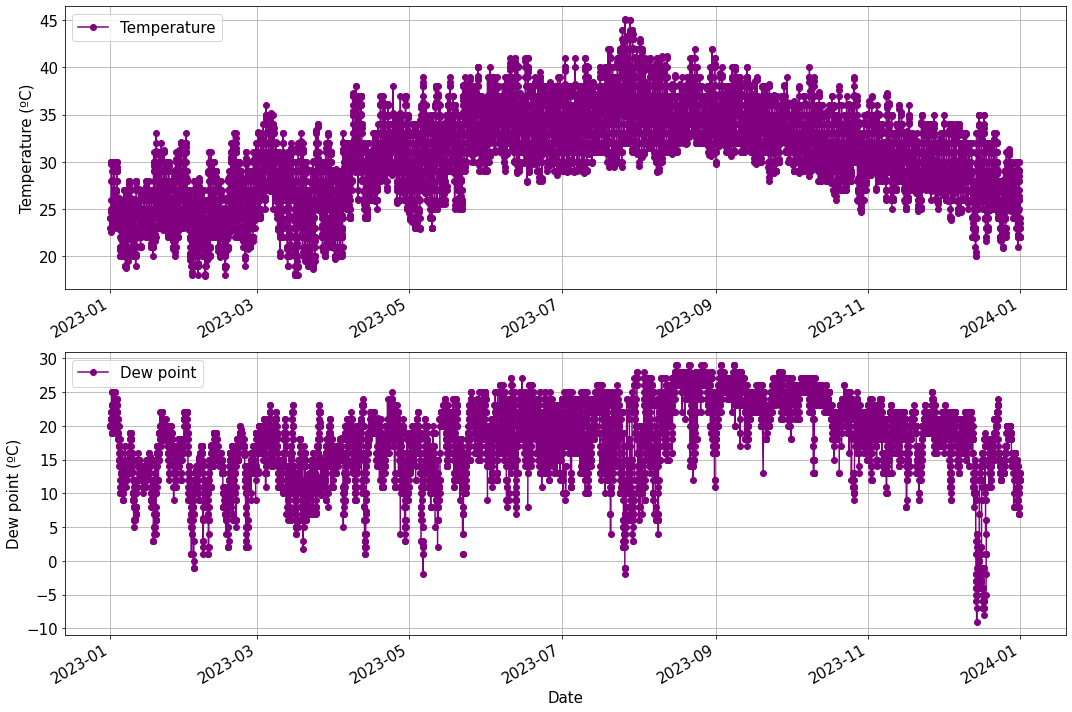

In [5]:
# Plot the data: Temperature

# Plotting the temperature
fig, ax = plt.subplots(2, 1, figsize=(15, 10))  # Adjust the size as needed
df_isd.loc[:, ['TMP']].plot(ax=ax[0], kind='line', title='', ylabel='Temperature (ºC)', xlabel='', marker='o', grid=True, color='purple')
ax[0].tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax[0].xaxis.label.set_size(15)  # X-axis label size
ax[0].yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax[0].legend(['Temperature'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Plotting the Dew point
df_isd.loc[:, ['DEW']].plot(ax=ax[1], kind='line', title='', ylabel='Dew point (ºC)', xlabel='Date', marker='o', grid=True, color='purple')
ax[1].tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax[1].xaxis.label.set_size(15)  # X-axis label size
ax[1].yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax[1].legend(['Dew point'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_3/Observed_data.png', dpi = 300)


# Show the plot
plt.show()

# Part 2: Heat Index (HI) Calculation

In [6]:
# Convert dewpoint temperature (C) to relative humidity (%), and create a new column
df_isd['RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values,df_isd['TMP'].values)

In [7]:
# Calculate the Heat Index
df_isd['HI'] = tools.gen_heat_index(df_isd['TMP'].values, df_isd['RH'].values)

In [8]:
# Get the highest HI
df_isd.max()

TMP     45.100000
DEW     29.000000
WND     11.800000
RH     100.000000
HI      55.259491
dtype: float64

In [9]:
# To answer: What is the day and time when the highest HI was observed?
UTC_time = df_isd.idxmax()
UTC_time

TMP   2023-07-26 09:00:00
DEW   2023-08-16 01:00:00
WND   2023-06-29 11:00:00
RH    2023-01-02 22:00:00
HI    2023-08-21 10:00:00
dtype: datetime64[ns]

In [10]:
# Specify the UTC time zone
utc_timezone = pytz.utc

# Convert UTC time to Saudi Arabia local time (AST)
saudi_arabia_timezone = pytz.timezone('Asia/Riyadh')  # 'Asia/Riyadh' is the time zone for Saudi Arabia

# Convert the Series to a pandas DateTime series using the dt accessor
utc_series_dt = pd.to_datetime(UTC_time)


# Apply the time zone conversion
local_time_saudi_arabia = UTC_time.dt.tz_localize(utc_timezone).dt.tz_convert(saudi_arabia_timezone)
local_time_saudi_arabia

TMP   2023-07-26 12:00:00+03:00
DEW   2023-08-16 04:00:00+03:00
WND   2023-06-29 14:00:00+03:00
RH    2023-01-03 01:00:00+03:00
HI    2023-08-21 13:00:00+03:00
dtype: datetime64[ns, Asia/Riyadh]

In [11]:
# What air temperature and relative humidity were observed at this moment (highest HI)?

# Temperature
temperature_max_HI = df_isd.loc[["2023-08-21 10:00:00"]]["TMP"].values[0]
print(f'The air temperature is {df_isd.loc[["2023-08-21 10:00:00"]]["TMP"].values[0] } Celsius') 
print(f'The air temperature is { temperature_max_HI*(9/5)+32 } Fahrenheit') 


# Relative humidity
print(f'Relative humidity is {df_isd.loc[["2023-08-21 10:00:00"]]["RH"].values[0] } %') 

print('Based on the National Weather Services, an Heat Index of 129 (extreme danger) can be related to heat stroke (highly likely)')

The air temperature is 38.0 Celsius
The air temperature is 100.4 Fahrenheit
Relative humidity is 60.42701249535727 %
Based on the National Weather Services, an Heat Index of 129 (extreme danger) can be related to heat stroke (highly likely)


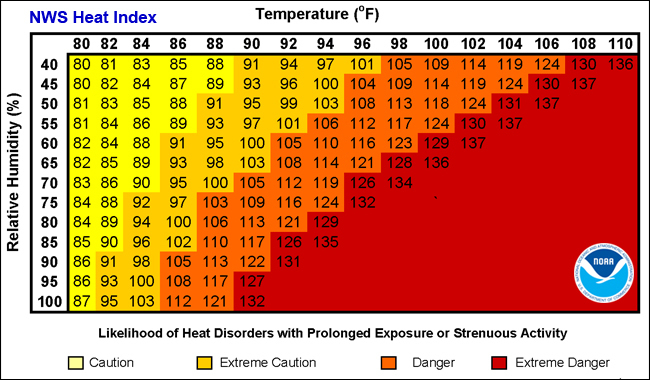

Can this event of high temperature and humidity be called a heatwave?
As a first answer we can claim that it is a heatwave due to it last more than 2 days, with values above 100 Fahrenheit considering an average of 86.85 Fahrenheit. However, it is important to do a more robust analysis in which we consider more meteorological stations.

In [12]:
#temperature_max_HI = df_isd.loc[["2023-08-20 10:00:00"]]["TMP"].values[0]
#print(f'The air temperature is { } Celsius') 
print(f'The air temperature at 2023-08-20 10:00:00 is { df_isd.loc[["2023-08-20 10:00:00"]]["TMP"].values[0]*(9/5)+32 } Fahrenheit')
print(f'The air temperature at 2023-08-21 10:00:00 is { df_isd.loc[["2023-08-21 10:00:00"]]["TMP"].values[0]*(9/5)+32 } Fahrenheit')
print(f'The air temperature at 2023-08-22 10:00:00 is { df_isd.loc[["2023-08-22 10:00:00"]]["TMP"].values[0]*(9/5)+32 } Fahrenheit') 

The air temperature at 2023-08-20 10:00:00 is 102.2 Fahrenheit
The air temperature at 2023-08-21 10:00:00 is 100.4 Fahrenheit
The air temperature at 2023-08-22 10:00:00 is 100.4 Fahrenheit


In [13]:
# The mean temperature of the station is
print(f'The mean air temperature is { df_isd.mean().values[0] *(9/5)+32 } Fahrenheit')

The mean air temperature is 86.85279377431924 Fahrenheit


In [14]:
# Resample hourly data to daily data (mean per day)
df_daily = df_isd.resample('D').mean()  # You can use other aggregation functions like mean, max, etc.
# Get the Heat Index per day
df_daily_HI = df_daily.loc[:, ['HI']]

In [15]:
# Print the Heat Index per day (first glince)
df_daily_HI

,HI
2023-01-01,26.981322
2023-01-02,26.750346
2023-01-03,27.688366
2023-01-04,24.936287
2023-01-05,24.602293
...,...
2023-12-27,28.953869
2023-12-28,27.506955
2023-12-29,26.567255
2023-12-30,26.440287


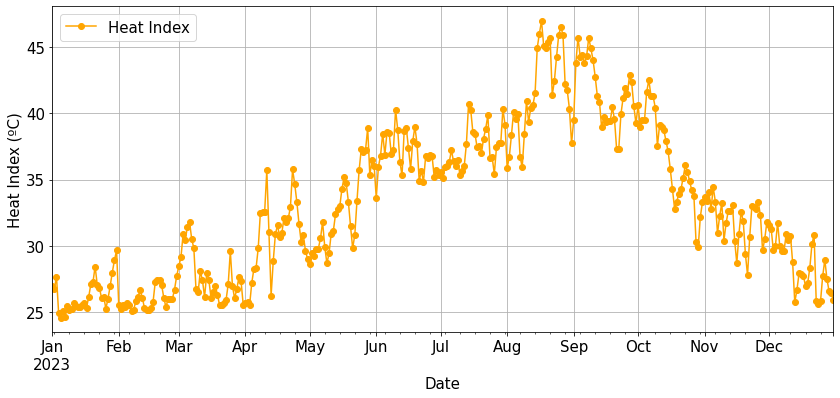

In [16]:
# Plotting the heat index for 2023
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust the size as needed
df_daily_HI.plot(ax=ax, kind='line', title='', ylabel='Heat Index (ºC)', xlabel='Date', marker='o', grid=True, color='orange')
ax.tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax.xaxis.label.set_size(15)  # X-axis label size
ax.yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax.legend(['Heat Index'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_3/heat_index.png', dpi = 300)

# Show the plot
plt.show()

# Part 3: Potential Impact of Climate Change

In [17]:
# Add 3ºC to all values in the 'TMP' column, and creating a new one
df_isd['TMP2']  = df_isd.loc[:, ['TMP']] + 3

In [18]:
df_isd

,TMP,DEW,WND,RH,HI,TMP2
2023-01-01 00:00:00,24.0,20.0,2.1,78.359845,24.470417,27.0
2023-01-01 00:00:00,24.0,20.0,2.1,78.359845,24.470417,27.0
2023-01-01 01:00:00,23.0,20.0,1.5,83.227911,22.755222,26.0
2023-01-01 02:00:00,23.0,20.0,NaN,83.227911,22.755222,26.0
2023-01-01 03:00:00,22.6,20.0,NaN,85.269719,21.983819,25.6
...,...,...,...,...,...,...
2023-12-31 20:00:00,23.0,12.0,2.1,49.934280,25.076383,26.0
2023-12-31 21:00:00,22.0,13.0,NaN,56.659455,24.670154,25.0
2023-12-31 21:00:00,22.0,13.0,NaN,56.659455,24.670154,25.0
2023-12-31 22:00:00,22.0,12.0,2.1,53.060761,24.838337,25.0


In [19]:
# Convert dewpoint temperature (ºC) to relative humidity (%), and create a new column
df_isd['RH2'] = tools.dewpoint_to_rh(df_isd['DEW'].values,df_isd['TMP2'].values)

In [20]:
# Calculate the Heat Index (for + 3ºC)
df_isd['HI2'] = tools.gen_heat_index(df_isd['TMP2'].values, df_isd['RH2'].values)

In [21]:
# Get the highest HI
df_isd.max()

TMP      45.100000
DEW      29.000000
WND      11.800000
RH      100.000000
HI       55.259491
TMP2     48.100000
RH2      83.796297
HI2      59.293985
dtype: float64

In [22]:
# To answer: What is the day and time when the highest HI was observed?
UTC_time = df_isd.idxmax()
UTC_time

TMP    2023-07-26 09:00:00
DEW    2023-08-16 01:00:00
WND    2023-06-29 11:00:00
RH     2023-01-02 22:00:00
HI     2023-08-21 10:00:00
TMP2   2023-07-26 09:00:00
RH2    2023-01-02 22:00:00
HI2    2023-08-21 10:00:00
dtype: datetime64[ns]

In [23]:
# What air temperature and relative humidity were observed at the highest Heat Index (+3ºC)?

# Temperature
temperature_max_HI_2 = df_isd.loc[["2023-08-21 10:00:00"]]["TMP2"].values[0]
print(f'The air temperature is {df_isd.loc[["2023-08-21 10:00:00"]]["TMP2"].values[0] } Celsius') 
print(f'The air temperature is { temperature_max_HI_2*(9/5)+32 } Fahrenheit') 


# Relative humidity
print(f'Relative humidity is {df_isd.loc[["2023-08-21 10:00:00"]]["RH2"].values[0] } %') 

print('Based on the National Weather Services, an Heat Index of 137 (extreme danger) can be related to heat stroke (highly likely)')

The air temperature is 41.0 Celsius
The air temperature is 105.8 Fahrenheit
Relative humidity is 51.45342438963766 %
Based on the National Weather Services, an Heat Index of 137 (extreme danger) can be related to heat stroke (highly likely)


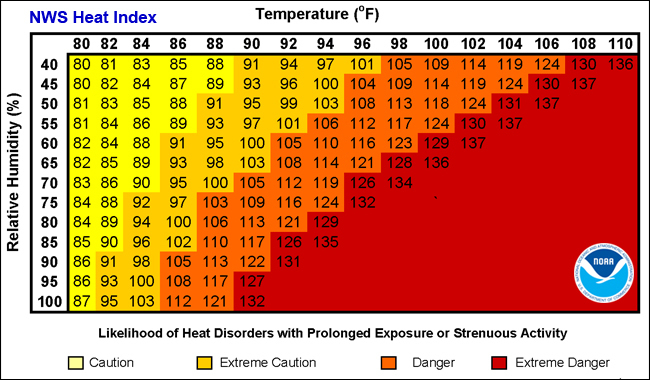

In [24]:
# Resample hourly data to daily data (mean per day)
df_daily_2 = df_isd.resample('D').mean()  # You can use other aggregation functions like mean, max, etc.
# Get the Heat Index per day
df_daily_HI_2 = df_daily_2.loc[:, ['HI2']]

In [25]:
# Print the Heat Index per day (first glince)
df_daily_HI_2

,HI2
2023-01-01,31.186780
2023-01-02,31.303023
2023-01-03,32.202245
2023-01-04,27.710302
2023-01-05,26.259943
...,...
2023-12-27,32.300402
2023-12-28,30.299209
2023-12-29,28.792187
2023-12-30,28.484818


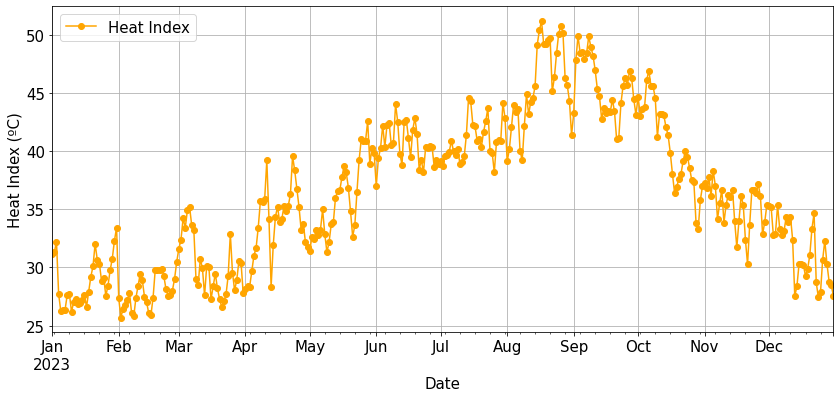

In [26]:
# Plotting the heat index for 2023
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust the size as needed
df_daily_HI_2.plot(ax=ax, kind='line', title='', ylabel='Heat Index (ºC)', xlabel='Date', marker='o', grid=True, color='orange')
ax.tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax.xaxis.label.set_size(15)  # X-axis label size
ax.yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax.legend(['Heat Index'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_3/heat_index_plus3C.png', dpi = 300)

# Show the plot
plt.show()